**Deep Learning Project 1 : Breast Cancer Classification**

**Importing the Dependencies** (libraries)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

Data Collection and Processing

In [ ]:
# loading data from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
#loading the data to a dataframe
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [ ]:
#print first 5 rows of the dataframe
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#adding the 'target' column to the data frame
data_frame['label'] = breast_cancer_dataset.target

In [ ]:
#print last 5 rows of the data frame
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [ ]:
data_frame.shape

(569, 31)

In [ ]:
#getting some info about the data
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
#checking for missing values 
data_frame.isnull().sum()   # --> no values are missing

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [ ]:
#checking for (descriptive) statistical measures about the data
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
#checking the distribution of target variable --> imbalance would make the model not train well --> upsampling or downsampling would be required
data_frame['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

0 --> malignant

1 --> benign

In [ ]:
# grouping all datapoints by label 0 and label 1 and finding the avg. for each of the columns --> for malignant cases, radius is larger
data_frame.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


Separating the features and target

In [ ]:
X = data_frame.drop(columns='label', axis = 1)    #label not present in X --> target not present in X
Y = data_frame['label']

In [ ]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [ ]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


Splitting the data into training data & testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3) #test_size --> required percentage of data ; random state --> splitting data in a way

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


Standardize the data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

In [ ]:
print(X_train_std)  #train NN with standardized data for better accuracy

Building the Neural Network --> using tensorflow (DL library created by Google) and keras (used tensorflow as backend and used APIs for easing the process of creating NNs)

Input --> Hidden --> Output (target - 0 or 1)

In [ ]:
#importing tensorflow and keras
import tensorflow as tf
tf.random.set_seed(3) #initializing weight and not setting it to zero
from tensorflow import keras

In [ ]:
#setting up the layers of Neural Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)), #convert layer into a 1-D matrix
    keras.layers.Dense(20, activation = 'relu'),  #20 neurons
    keras.layers.Dense(2, activation = 'sigmoid')   #output layer (no. of neurons) 2 --> no of classes
])

In [ ]:
#compile the NN with optimizers etc

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  #loss function
              metrics=['accuracy'])

In [ ]:
#training the NN
history = model.fit(X_train_std, Y_train, validation_split = 0.1, epochs = 27)  #epoch --> no of times NN goes through data

Epoch 1/27
13/13 [==============================] - 1s 16ms/step - loss: 0.5369 - accuracy: 0.7604 - val_loss: 0.6535 - val_accuracy: 0.7609
Epoch 2/27
13/13 [==============================] - 0s 6ms/step - loss: 0.3785 - accuracy: 0.8826 - val_loss: 0.4922 - val_accuracy: 0.7826
Epoch 3/27
13/13 [==============================] - 0s 5ms/step - loss: 0.2813 - accuracy: 0.9169 - val_loss: 0.3970 - val_accuracy: 0.8261
Epoch 4/27
13/13 [==============================] - 0s 6ms/step - loss: 0.2304 - accuracy: 0.9267 - val_loss: 0.3259 - val_accuracy: 0.8478
Epoch 5/27
13/13 [==============================] - 0s 5ms/step - loss: 0.1957 - accuracy: 0.9364 - val_loss: 0.2833 - val_accuracy: 0.8478
Epoch 6/27
13/13 [==============================] - 0s 5ms/step - loss: 0.1732 - accuracy: 0.9438 - val_loss: 0.2507 - val_accuracy: 0.8913
Epoch 7/27
13/13 [==============================] - 0s 4ms/step - loss: 0.1559 - accuracy: 0.9487 - val_loss: 0.2262 - val_accuracy: 0.8913
Epoch 8/27
13/13 [=

Visualizing accuracy and loss

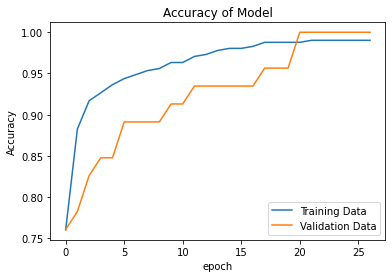

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Accuracy of Model')
plt.ylabel('Accuracy')
plt.xlabel('epoch')

plt.legend(['Training Data', 'Validation Data'], loc = 'lower right')

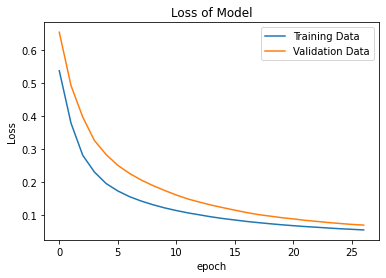

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Loss of Model')
plt.ylabel('Loss')
plt.xlabel('epoch')

plt.legend(['Training Data', 'Validation Data'], loc = 'upper right')

Accuracy of the Model on Test Data

In [ ]:
loss, accuracy = model.evaluate(X_test_std, Y_test)   #X_test_std --> std. test data; Y_test --> true value
print(accuracy)

4/4 [==============================] - 0s 4ms/step - loss: 0.1021 - accuracy: 0.9649
0.9649122953414917


In [ ]:
print(X_test_std.shape)
print(X_test_std[0])

(114, 30)
[-0.99455847 -0.05522817 -0.93005495 -0.87063883 -0.03527898  0.14111718
 -0.33690822 -0.59941648  0.33050133  0.21713585  0.13425946 -0.01557434
  0.24077407 -0.29550715  0.08569201  0.50739436  0.01754572  0.24853314
  1.64942557 -0.21818134 -0.90317465 -0.42998447 -0.86001833 -0.7945183
 -0.56289993 -0.06136446 -0.41875294 -0.5697545   0.02503231 -0.50225186]


In [ ]:
Y_pred = model.predict(X_test_std)

In [ ]:
print(Y_pred.shape)
print(Y_pred[0])

(114, 2)
[0.0202525  0.96176946]


In [ ]:
print(X_test_std)

[[-0.99455847 -0.05522817 -0.93005495 ... -0.5697545   0.02503231
  -0.50225186]
 [ 0.10656204  0.03898678  0.08315834 ... -0.32036185 -0.70933265
  -0.5692316 ]
 [-0.72278064 -0.03348626 -0.73041501 ... -0.75844367  0.17378428
  -0.12576093]
 ...
 [ 0.68654154  2.15036791  0.65326834 ...  0.36531844 -1.10548262
  -0.37639478]
 [-0.35293864 -1.46362085 -0.41837615 ... -0.95251542 -0.9629939
  -0.86523882]
 [-0.50703947 -1.02153533 -0.56445416 ... -1.03818808 -0.98021781
  -1.37352859]]


In [ ]:
print(Y_pred) # compare the two labels; if 1st is larger, return 0 => malignant, else 1 => benign

[[2.02524960e-02 9.61769462e-01]
 [3.54718208e-01 6.71397328e-01]
 [1.16662383e-01 9.53291118e-01]
 [6.77785277e-03 9.90909815e-01]
 [9.45677102e-01 5.32999933e-02]
 [5.52447140e-02 8.54043484e-01]
 [3.33740115e-02 9.09955621e-01]
 [1.05309188e-02 9.74111915e-01]
 [6.75180554e-03 9.85098958e-01]
 [4.97132242e-02 9.85888004e-01]
 [2.49362588e-02 9.87093449e-01]
 [8.02942514e-01 1.70235336e-02]
 [4.25562263e-03 9.79456604e-01]
 [7.69813657e-02 4.20837253e-01]
 [2.18373537e-03 9.62148964e-01]
 [2.34397918e-01 9.77377772e-01]
 [2.14922428e-02 9.63436961e-01]
 [2.22799182e-03 9.73515868e-01]
 [9.32018757e-01 7.43758678e-03]
 [2.34235317e-01 9.16300952e-01]
 [3.23461890e-02 9.68961835e-01]
 [6.21474683e-02 9.74852085e-01]
 [1.93925798e-01 7.73906946e-01]
 [3.87879878e-01 4.32113141e-01]
 [3.14865708e-02 9.82497454e-01]
 [3.81010771e-03 9.86201882e-01]
 [5.94779551e-02 9.67851043e-01]
 [9.80811179e-01 6.21861219e-03]
 [9.65800107e-01 2.28062272e-03]
 [1.18984401e-01 8.96973789e-01]
 [6.443389

model.predict() gives the prediction probability of each class for the data point

In [ ]:
# argmax function

#my_list = [100, 10]

#index_of_max_value = np.argmax(my_list)
#print(my_list)
#print(index_of_max_value)

In [ ]:
# converting the prediction probability to class labels (better understanding of whether 0 (malignant) or 1 (benign) )

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)


[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1]


**Building the Predictive System**

In [ ]:
input_data = (16.02,23.24,102.7,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,0.3795,1.187,2.466,40.51,0.004029,0.009269,0.01101,0.007591,0.0146,0.003042,19.19,33.88,123.8,1150,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452)

# change the input_data to a numpy_array
input_data_as_numpy_array = np.asarray(input_data)

# reshape numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if (prediction_label[0] == 0):
  print("Malignant Tumor")

else:
  print("Benign Tumor")

[[0.64433897 0.30923012]]
[0]
Malignant Tumor


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
